# Amin Roshanizarmehri (s4945064)
## Fundamentals of Organization 

## Methodology of research 

### 1- Increasing customer satisfaction of food delivery by optimizing the cost and time delivery

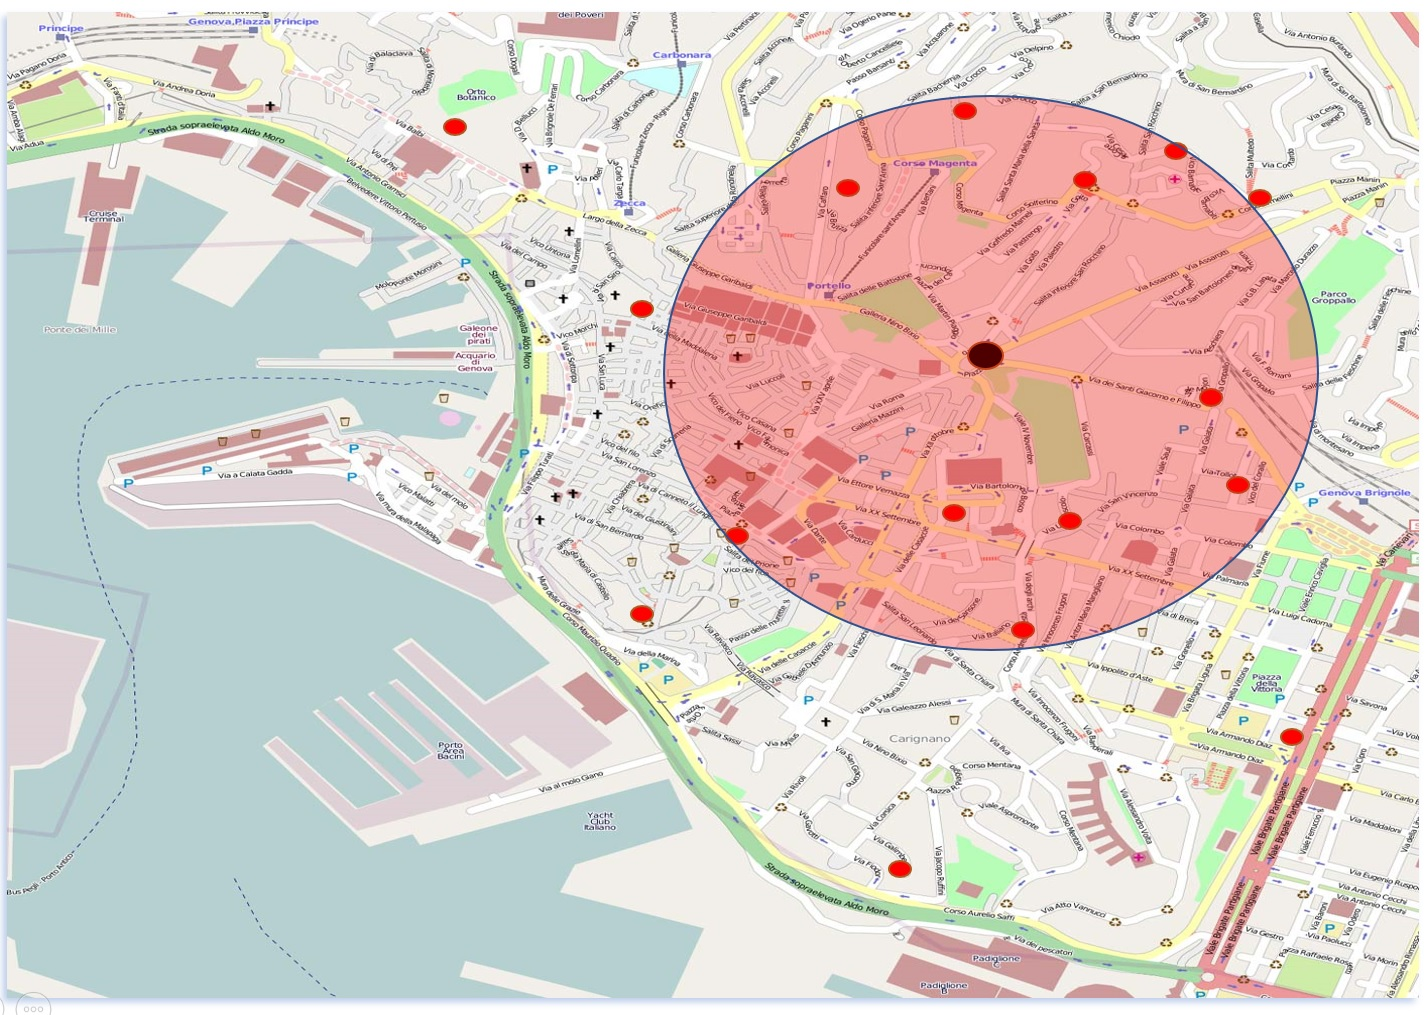

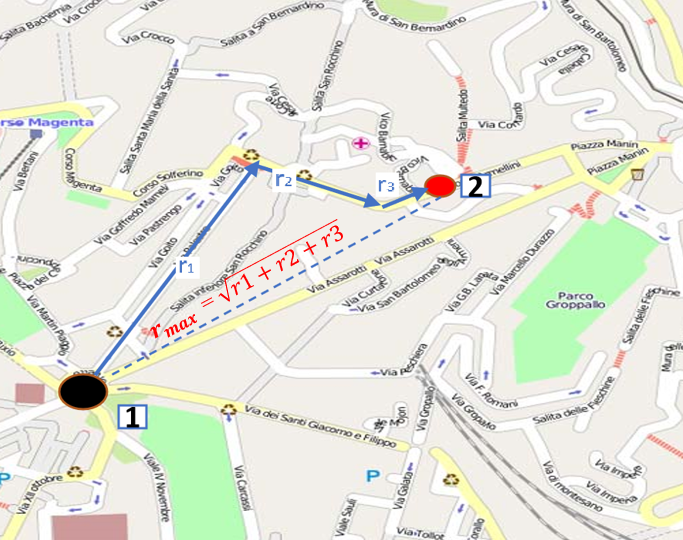


### 2- Using Dijkastra algorithm to find shortest path. Later we use this rout as a regreesion line

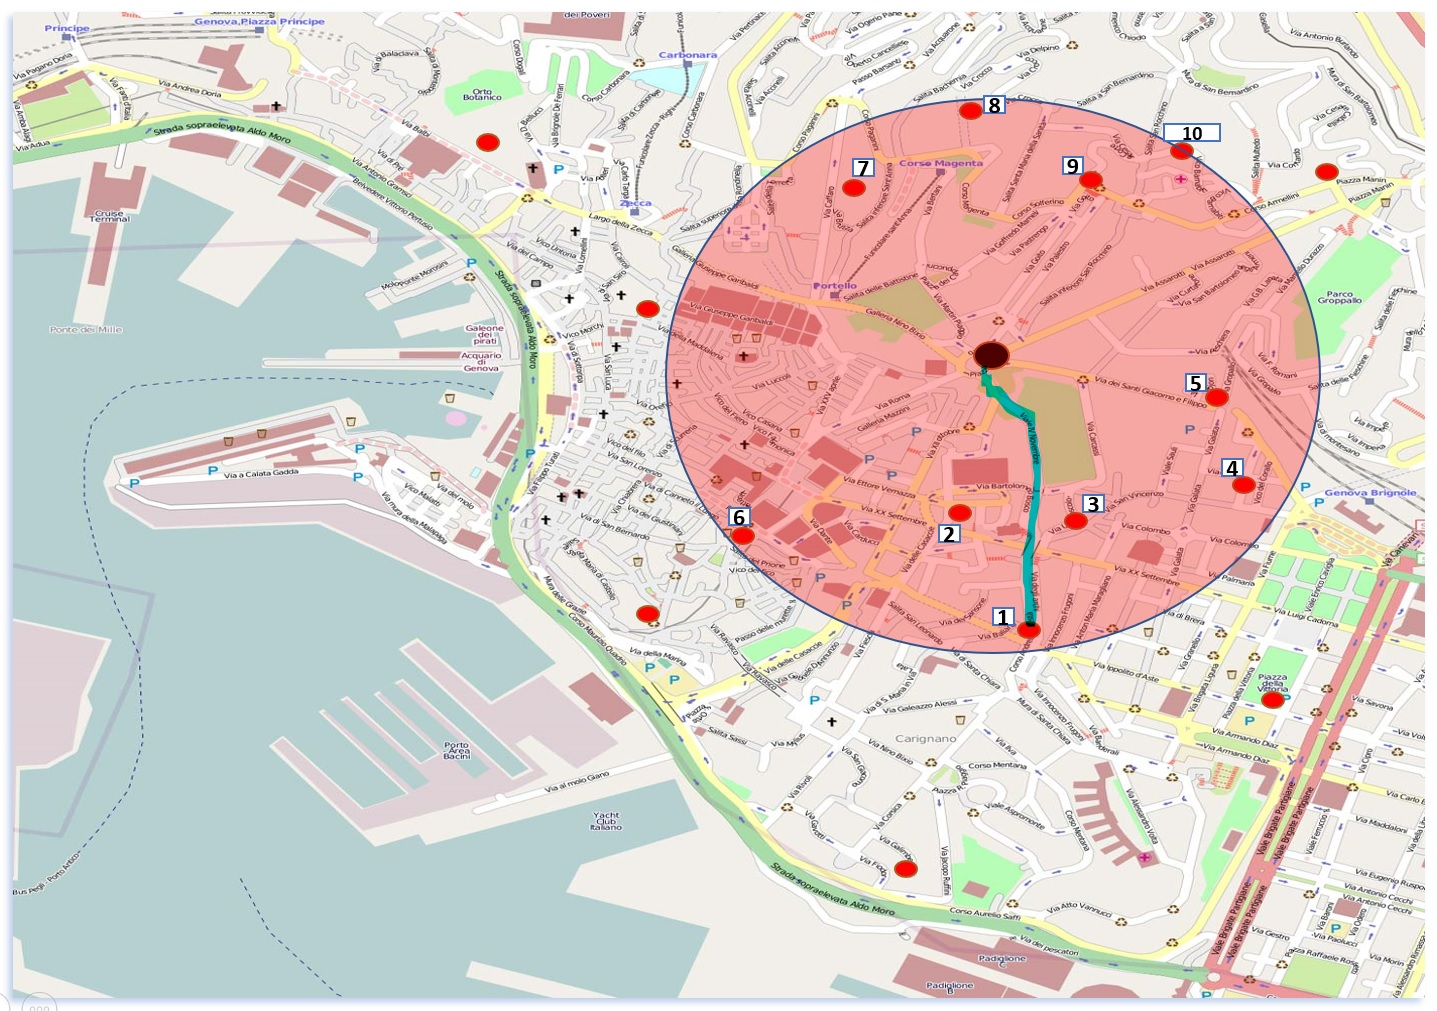

### 3- After extracting shrtest path (regression line) we use Knn regression algorithm to find nearest customers to curent delivery and then assign these nearest customers to current delivery.

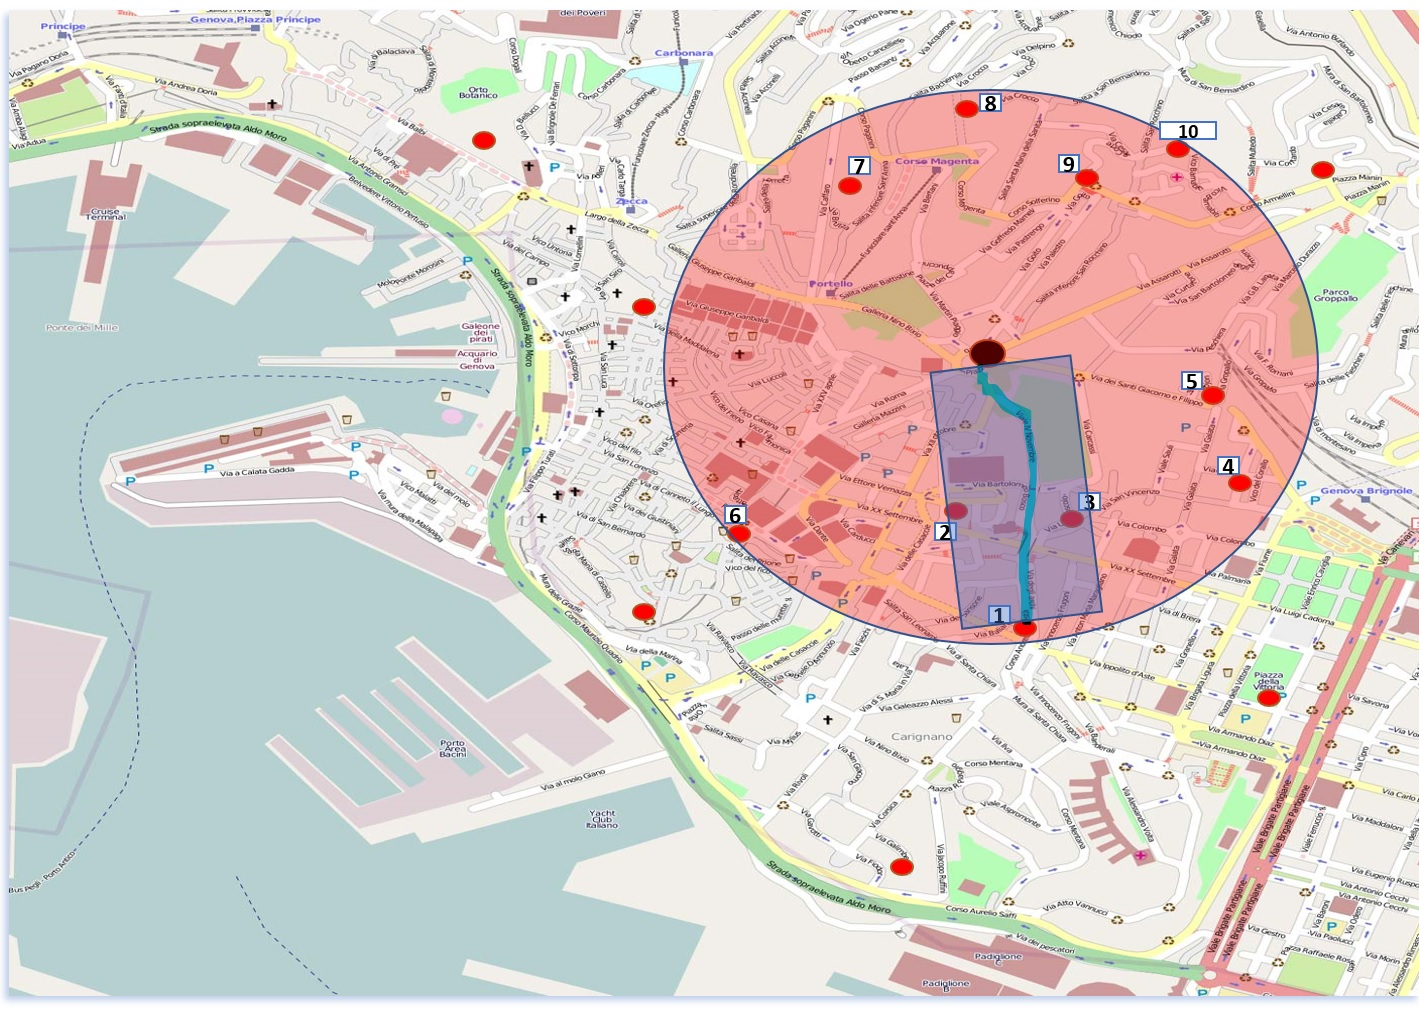

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

## Real data of GPS is not available so we make a random graph which represent nods and arks (routs)

for now I dont have the GEO information so I make the nods of cordination

In [3]:
import random

class Vertex: 
    def __init__(self,name,index): 
        self.name = name
        self.index=index
        self.cost=10
        self.outArcs=[]
  
    def __str__(self):
        return str(self.index)
  
    def __repr__(self):
        return str(self.index)
  
    def addArc(self,toV,cost=0): 
        a=Arc(self,toV,cost)
        self.outArcs.append(a)
        return a

    def getArc(self,toV): 
        for a in self.outArcs:
            if a.toV.index==toV or a.toV==toV:
                return a
        return None

class Arc: 
    def __init__(self,fromV,toV,cost): 
        self.fromV = fromV
        self.toV=toV
        self.cost=cost

class Graph: 
    def __init__(self): 
        self.vertices = []

    def addVertex(self,name): 
        v=Vertex(name,len(self.vertices))
        self.vertices.append(v)
        return v

    def createRandom(self,numV,numA):
        for _ in range(numV):
            self.addVertex("")

        for a in range(numV):
            b=(a+1)%numV
            self.vertices[a].addArc(self.vertices[b],random.randint(100, 18000))

        if numA-numV>0:
            pos=[i for i in range(0,numV)]
            random.shuffle(pos)
            for i in range(numA-numV):
                a=random.randint(0, numV-1)
                #a=pos[i%numV]
                b=random.randint(0, numV-1)
                while(a==b or self.vertices[a].getArc(b)!=None):
                    b=random.randint(0, numV-1)
                self.vertices[a].addArc(self.vertices[b],random.randint(200, 9000))
                
        return self.vertices
                
                
    def printGraph(self):
        print("********************")
        if self.isStrongConnected():
            print("The graph is strongly connected")
        else:
            print("The graph is NOT strongly connected")
        for v in self.vertices:
            print("V:",v.index,": ",end = '')
            #print("  ",end = '')
            for a in v.outArcs:
                print("(v:",a.toV.index,",c:",a.cost,")",end = '')
                #print(a.toV.index,end = ' ')
            print()
        print("********************")
   
    def isConnected(self,v):
        #visited =  [False for _ in self.vertices] 
        visited =  [False] * len(self.vertices)
        visited[v.index]=True
        toVisit=[v]
        num_visited=1
        while len(toVisit) >0 :
            v=toVisit.pop()
            for a in v.outArcs:
                if visited[a.toV.index]==False:
                    num_visited+=1
                    visited[a.toV.index]=True
                    toVisit.append(a.toV)
        return num_visited==len(self.vertices)

    def isStrongConnected(self):
        for v in self.vertices:
            if not self.isConnected(v):
                return False
        return True

In [5]:
g=Graph()
num=20
g.createRandom(20,70)
g.vertices
g.printGraph()
print("all the customers",g.vertices)
# nm= list(set(np.random.choice(customers, size=10)))
# print("our customers nods",nm)


********************
The graph is strongly connected
V: 0 : (v: 1 ,c: 13329 )(v: 17 ,c: 1830 )(v: 8 ,c: 1680 )(v: 16 ,c: 3725 )(v: 5 ,c: 885 )(v: 9 ,c: 6812 )
V: 1 : (v: 2 ,c: 11344 )(v: 5 ,c: 2579 )(v: 12 ,c: 4198 )(v: 0 ,c: 2938 )(v: 17 ,c: 3700 )(v: 14 ,c: 1039 )
V: 2 : (v: 3 ,c: 14963 )(v: 14 ,c: 7435 )
V: 3 : (v: 4 ,c: 3085 )(v: 18 ,c: 1850 )
V: 4 : (v: 5 ,c: 3812 )(v: 0 ,c: 3212 )(v: 3 ,c: 7814 )(v: 9 ,c: 1147 )(v: 15 ,c: 7960 )(v: 12 ,c: 979 )
V: 5 : (v: 6 ,c: 12031 )
V: 6 : (v: 7 ,c: 1129 )(v: 10 ,c: 8121 )
V: 7 : (v: 8 ,c: 643 )(v: 6 ,c: 534 )(v: 17 ,c: 1857 )
V: 8 : (v: 9 ,c: 14271 )(v: 16 ,c: 2116 )
V: 9 : (v: 10 ,c: 17746 )(v: 3 ,c: 3214 )(v: 5 ,c: 7494 )(v: 8 ,c: 3774 )
V: 10 : (v: 11 ,c: 361 )(v: 17 ,c: 2694 )
V: 11 : (v: 12 ,c: 17205 )(v: 8 ,c: 7262 )(v: 19 ,c: 1199 )(v: 5 ,c: 971 )
V: 12 : (v: 13 ,c: 8343 )(v: 11 ,c: 1399 )
V: 13 : (v: 14 ,c: 5600 )(v: 19 ,c: 1073 )(v: 10 ,c: 5894 )(v: 11 ,c: 1020 )(v: 4 ,c: 4762 )(v: 17 ,c: 1599 )
V: 14 : (v: 15 ,c: 15441 )(v: 7 ,c: 43

## shortest path algorithm

In [6]:
def extractMin(toVisit,status):
    ris=toVisit[0]
    for v in toVisit:
        if status[ris.index]>status[v.index]:
            ris=v
    toVisit.remove(ris)
    return ris

## To find shortes path between two nods
def dijkstra(g,v,to):
    # nods here give the rout of shortest path
    nods=[]
    status =  [-1] * len(g.vertices)
    status[v.index]=0
    toVisit=[v]
    while len(toVisit) >0 :
        v=extractMin(toVisit,status)
        nods.append(v)
        if v.index==to.index:
            return [nods,status[v.index]]
#             return status[v.index]
        for a in v.outArcs:
            cost=a.cost+status[v.index]
            if status[a.toV.index]==-1:
                status[a.toV.index]=cost
                toVisit.append(a.toV)
            elif cost<status[a.toV.index]:
                status[a.toV.index]=cost        
    return None




## To find R_nearest neighbors of customers to the fastfood 

def R_NN(g,v):
    status =  [-1] * len(g.vertices)
    status[v.index]=0
    toVisit=[v]
    while len(toVisit) >0 :
        v=extractMin(toVisit,status)
        for a in v.outArcs:
            cost=a.cost+status[v.index]
            if status[a.toV.index]==-1:
                status[a.toV.index]=cost
                toVisit.append(a.toV)
            elif cost<status[a.toV.index]:
                status[a.toV.index]=cost
 

    customer_dict = dict(zip(g.vertices, status))
    # bike_nods give us all the nods should be delivered
    bike_nods=[-1] * len(g.vertices)
    motor_nods=[-1] * len(g.vertices)
    i=0
    for d in status : 
        if d <= 10000:
            bike_nods[i]=g.vertices[i]
        else:
            motor_nods[i]= g.vertices[i]
        i=i+1
    motor_nods[0]=0
    
    return bike_nods,motor_nods, customer_dict



## finding those orders can be delivered by bike. (-1) means this order wont be supported by this vehichle

In [7]:
all_distance_nods=R_NN(g,g.vertices[0])[2]
eligible_nods_bike=R_NN(g,g.vertices[0])[0]
eligible_nods_motor = R_NN(g,g.vertices[0])[1]
print("all distances to the fastfoot : ",all_distance_nods,";")
print("\n")
print("###############################")
print("nods shoud be covered by bike  : ",eligible_nods_bike,";")
print("nods shoud be covered by motor  : ",eligible_nods_motor,";")

all distances to the fastfoot :  {0: 0, 1: 13329, 2: 24673, 3: 10026, 4: 8051, 5: 885, 6: 12904, 7: 12370, 8: 1680, 9: 6812, 10: 15446, 11: 7823, 12: 6424, 13: 9552, 14: 7983, 15: 16011, 16: 3725, 17: 1830, 18: 11876, 19: 9022} ;


###############################
nods shoud be covered by bike  :  [0, -1, -1, -1, 4, 5, -1, -1, 8, 9, -1, 11, 12, 13, 14, -1, 16, 17, -1, 19] ;
nods shoud be covered by motor  :  [0, 1, 2, 3, -1, -1, 6, 7, -1, -1, 10, -1, -1, -1, -1, 15, -1, -1, 18, -1] ;


## first priority based on eligible list 

In [8]:
def priority(eligible_nods):
    j=0
    result =[]
    for i in eligible_nods:
        if isinstance(i,int) ==0 and i.index!=0 :
            return j

        j+=1


## finding shortest path to the first priority (dijkastra)

In [9]:
def shortestpath_nods (priorities):   
    all_nods_in_shotestpath = dijkstra(g,g.vertices[0],g.vertices[priorities])[0]
    
    return all_nods_in_shotestpath

In [10]:
def shortestpath_cost (priorities): 
    cos_of_shotestpath = dijkstra(g,g.vertices[0],g.vertices[priorities])[1]
    return cos_of_shotestpath

## add other customer to first priority based on KNN_Regression

In [ ]:
# def knn_regression (first_priority,customer_nods):
# #     sort_customers = [[-1] * len(g.vertices)]* len(g.vertices)
#     distance_customer_path_list = []
#     nods_of_shortesPath= shortestpath_nods(first_priority)
# #     print(nods_shortesPath)
#     for j in customer_nods:
#         if isinstance(j,int) ==0 and j.index !=first_priority and j.index !=0  :
#             for i in nods_of_shortesPath:
#                 distance_customer_path = (dijkstra(g,g.vertices[i.index],g.vertices[j.index])[1])
#                 distance_customer_path_list.append({"distance": distance_customer_path,"index": j.index})
                                
#     newlist = sorted(distance_customer_path_list, key=lambda d: d['distance'])
#     new_assigned = []
    
#     update_list = [-2]*len(g.vertices)
#     next_iter_list = [-1]*len(g.vertices)
    
#     i=0
#     for k in newlist :
#         index=k["index"]

#         if k["index"] in nods_of_shortesPath :
#             continue 
#         elif len(new_assigned)>=2:
#             if update_list[index] == -2 :
#                 update_list[index]=index   
#         else :
#             if k["index"] in new_assigned :
#                 continue
#             else:
#                 new_assigned.append(k["index"])
#                 update_list[index]=-1            
#                 i+=1
   
#     k=0  
#     for w in update_list:
#         if w >=0 : 
#             k+=1
#             next_iter_list[w]= g.vertices[w]
#     if k==0 :
#         print("all the orders were delivered") 
        

            
#     return new_assigned, newlist , next_iter_list, update_list



In [ ]:
print("nods shoud be covered by bike  : ",eligible_nods_bike,";")

In [140]:
first_priority = priority(eligible_nods_bike)
print((first_priority))

4


In [ ]:
# shortestpath_nods (1)

In [ ]:
# shortestpath_cost (first_priority)

In [ ]:
## all the customers distances to the regression line
# knn_regression (first_priority,eligible_nods_bike)[1]

In [ ]:
# two more customeers add to the current delivery
# customer_added = knn_regression (first_priority,eligible_nods_bike)[0]
# print(customer_added)

In [ ]:
# new list for other delivery man
# remaining_nods= knn_regression (first_priority,eligible_nods_bike)[2]
# print(remaining_nods)


In [ ]:
# next_priority = priority(remaining_nods)
# print(next_priority)

In [137]:
def regression(first_priority,customer_nods):
    distance_customer_path_list = []
    nods_of_shortesPath= shortestpath_nods(first_priority)
    cost_of_delivery= shortestpath_cost (first_priority)
    for j in customer_nods:
        if isinstance(j,int) ==0 and j.index !=first_priority and j.index !=0  :
            for i in nods_of_shortesPath:
                distance_customer_path = (dijkstra(g,g.vertices[i.index],g.vertices[j.index])[1])
                distance_customer_path_list.append({"distance": distance_customer_path,"index": j.index})
                                
    list_distance = sorted(distance_customer_path_list, key=lambda d: d['distance'])
    
    newlist = sorted(distance_customer_path_list, key=lambda d: d['distance'])
    new_assigned = []
    
    update_list = [-2]*len(g.vertices)
    next_iter_list = [-1]*len(g.vertices)
    
    i=0
    for k in newlist :
        index=k["index"]

        if k["index"] in nods_of_shortesPath :
            continue 
        elif len(new_assigned)>=2:
            if update_list[index] == -2 :
                update_list[index]=index   
        else :
            if k["index"] in new_assigned :
                continue
            else:
                new_assigned.append(k["index"])
                update_list[index]=-1            
                i+=1
   
    k=0  
    for w in update_list:
        if w >=0 : 
            k+=1
            next_iter_list[w]= g.vertices[w]
    if k==0 :
        print("all the orders were delivered")  
        
        
    return new_assigned, newlist , next_iter_list, cost_of_delivery

In [142]:
def sorting_bike_deliveries (eligible_nods_bike, remaining_list):
    first_nod_to_deliver = priority(eligible_nods_bike)    
    add_two_customer , list_distance , remaining_list, Total_cost = regression(first_nod_to_deliver, remaining_list)    
    print("all the customers covering by bike",eligible_nods_bike)
    print("##########################################################")
    print("\n")
    print("first nod for delivering",first_nod_to_deliver)
    print("nods will be added to current delivery",add_two_customer)
    print("remaining customers to be deliveerd",remaining_list)
    print("\n")
    while True :
        find_nod_to_deliver = priority(remaining_list)
        if find_nod_to_deliver :
            add_two_customer , list_distance , remaining_list, cost= regression(find_nod_to_deliver, remaining_list)
            Total_cost+= cost
            print("next nod for delivering","##", find_nod_to_deliver,"##")
            print("nods will be added to current delivery",add_two_customer)
            print("remaining customers to be deliveerd",remaining_list)
            print("\n")
        else : break
            
    return Total_cost

In [143]:
cost_of_bike= sorting_bike_deliveries (eligible_nods_bike, eligible_nods_bike)
print("total cost bike=",cost_of_bike)
time_of_bike = cost_of_bike/2000
print("if the speed of biking is equal to 2000 m/h")
print("total time_of_bike_delivery=",time_of_bike,"h")

all the customers covering by bike [0, -1, -1, -1, 4, 5, -1, -1, 8, 9, -1, 11, 12, 13, 14, -1, 16, 17, -1, 19]
##########################################################


first nod for delivering 4
nods will be added to current delivery [5, 8]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, 9, -1, 11, 12, 13, 14, -1, 16, 17, -1, 19]


next nod for delivering ## 9 ##
nods will be added to current delivery [12, 16]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 11, -1, 13, 14, -1, -1, 17, -1, 19]


next nod for delivering ## 11 ##
nods will be added to current delivery [17, 19]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 13, 14, -1, -1, -1, -1, -1]


all the orders were delivered
next nod for delivering ## 13 ##
nods will be added to current delivery [14]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


total cost b

In [144]:
def sorting_motor_deliveries (eligible_nods_motor, remaining_list):
    first_nod_to_deliver = priority(eligible_nods_motor)    
    add_two_customer , list_distance , remaining_list, Total_cost = regression(first_nod_to_deliver, remaining_list)    
    print("all the customers covering by bike",eligible_nods_motor)
    print("##########################################################")
    print("\n")
    print("first nod for delivering",first_nod_to_deliver)
    print("nods will be added to current delivery",add_two_customer)
    print("remaining customers to be deliveerd",remaining_list)
    print("\n")
    while True :
        find_nod_to_deliver = priority(remaining_list)
        if find_nod_to_deliver :
            add_two_customer , list_distance , remaining_list, cost= regression(find_nod_to_deliver, remaining_list)
            Total_cost+= cost
            print("next nod for delivering","##", find_nod_to_deliver,"##")
            print("nods will be added to current delivery",add_two_customer)
            print("remaining customers to be deliveerd",remaining_list)
            print("\n")
        else : break
            
    return Total_cost

In [145]:
cost_of_motor= sorting_motor_deliveries (eligible_nods_motor, eligible_nods_motor)
print("total cost motor=",cost_of_motor)
time_of_motor = cost_of_motor/20000
print("if the speed of biking is equal to 20000 m/h")
print("total time_of_bike_delivery=",time_of_motor,"h")

all the customers covering by bike [0, 1, 2, 3, -1, -1, 6, 7, -1, -1, 10, -1, -1, -1, -1, 15, -1, -1, 18, -1]
##########################################################


first nod for delivering 1
nods will be added to current delivery [3, 6]
remaining customers to be deliveerd [-1, -1, 2, -1, -1, -1, -1, 7, -1, -1, 10, -1, -1, -1, -1, 15, -1, -1, 18, -1]


next nod for delivering ## 2 ##
nods will be added to current delivery [7, 10]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 15, -1, -1, 18, -1]


all the orders were delivered
next nod for delivering ## 15 ##
nods will be added to current delivery [18]
remaining customers to be deliveerd [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


total cost motor= 54013
if the speed of biking is equal to 20000 m/h
total time_of_bike_delivery= 2.70065 h


# compering my model to random delivery

In [122]:
all_nods_list= g.vertices.copy()
print(all_nods_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [123]:
def randomly_chose(all_nods_list):
    all_nods_list.pop(0)
    random_nods=random.sample(all_nods_list,8)
    bike=[]
    motor=[]
    for i in all_nods_list:
        if i not in random_nods:
            bike.append(i.index)
        else:
            motor.append(i.index)
    
    return bike , motor
#     result= []
#     k=0
#     for i in all_nods_list:
#         if isinstance(i,int) ==0 and i.index!=0 :
#             result.append(i.index)
#     if len (result) >0 : 
#         k = random.choice(result) 
#         return k 
        

#     else:
#         print("all the customers were delivered" )
    

      
    

In [76]:
lis=[g.vertices[2],g.vertices[4],g.vertices[6]]

In [132]:
bike_nods , motor_nods =randomly_chose(all_nods_list)
print(motor_nods,bike_nods )

[2, 3, 4, 5, 12, 13, 14, 18] [6, 7, 8, 9, 10, 11, 15, 16, 17, 19]


In [196]:
def delivery_by_motor(motor_nods):
    motor_cost= []
    total_cost_motor = 0
    for j in motor_nods:
         motor_cost.append(shortestpath_cost(j)) 
    for cost in motor_cost:
        total_cost_motor +=cost
    total_cost_motor = total_cost_motor/1.7
    time = total_cost_motor/20000
    return total_cost_motor,"cost" , time,"h"

In [197]:
delivery_by_motor(motor_nods)

(46747.05882352941, 'cost', 2.3373529411764706, 'h')

In [190]:
def delivery_by_bike(bike_nods):
    bike_cost= []
    total_cost_bike = 0
    for j in bike_nods:
         bike_cost.append(shortestpath_cost(j)) 
    for cost in bike_cost:
        total_cost_bike +=cost
    total_cost_bike = total_cost_bike/1.4
    time =total_cost_bike/2000
    return total_cost_bike,"cost", time, "h"

In [191]:
delivery_by_bike(bike_nods)

(62587.857142857145, 'cost', 31.293928571428573, 'h')

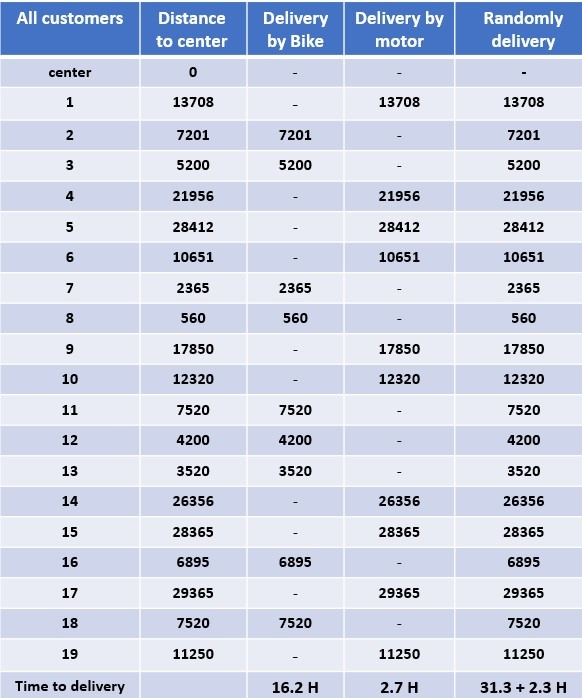